In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("D:\datasets\Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<Figure size 100x100 with 0 Axes>

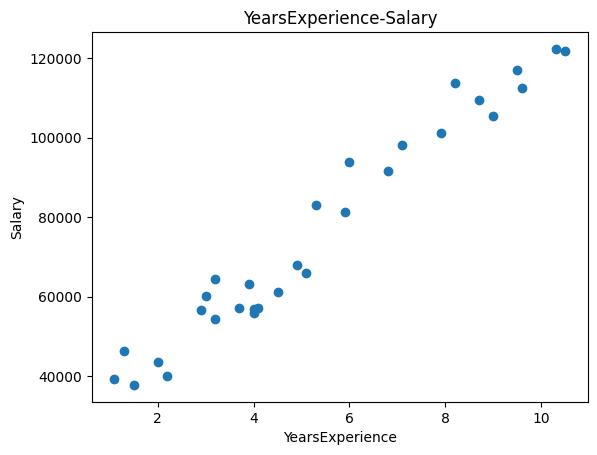

<Figure size 100x100 with 0 Axes>

In [4]:
##scatter plot
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("YearsExperience-Salary")
plt.figure(figsize=(1,1))

In [5]:
## Correlation
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


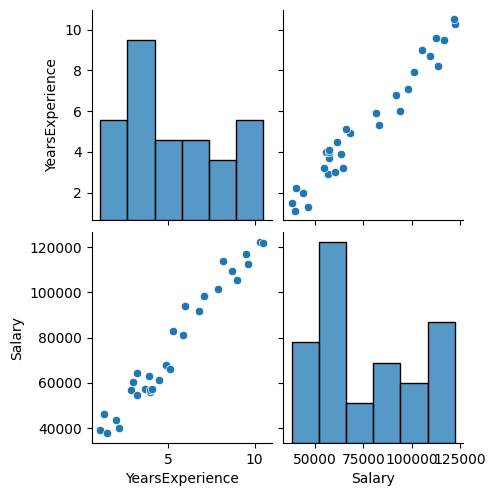

In [6]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [7]:
## Independent and dependent features
X=df[['YearsExperience']] ### independent features should be data frame or 2 dimesnionalarray
y=df['Salary'] ## this variiable can be in series or 1d array

In [8]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [9]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [10]:
X_train

array([[-0.29741739],
       [-1.38171623],
       [-0.97043047],
       [ 0.11386837],
       [-0.70870316],
       [-0.26002778],
       [-0.29741739],
       [ 1.1607776 ],
       [-1.306937  ],
       [-1.23215777],
       [ 1.57206337],
       [-1.0452097 ],
       [ 0.86166068],
       [ 1.75901144],
       [ 0.41298529],
       [ 2.13290759],
       [ 0.74949183],
       [-0.59653431],
       [-0.33480701],
       [-0.11046932],
       [ 0.45037491],
       [-0.67131355]])

In [11]:
X_test=scaler.transform(X_test)

In [12]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [13]:
regression=LinearRegression()

In [14]:
regression.fit(X_train,y_train)

LinearRegression()

In [15]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [25063.1519945]
Intercept: 70416.40909090909


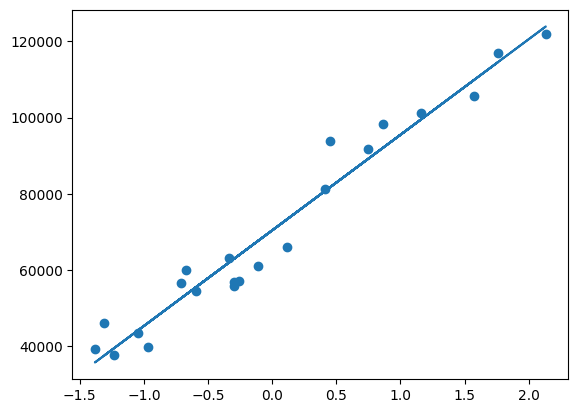

In [16]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

prediction of test data    
predicted height output= intercept +coef_(Weigh)                                                                                                                                      )
y_pred_test70416.40909090909 0 25063.151994529(X_test)

In [17]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [18]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

38802588.99247064
5056.995466663591
6229.172416338356


R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [19]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.9347210011126782


Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [20]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9238411679647912

In [21]:
## OLS Linear Regression
import statsmodels.api as sm

In [22]:
model=sm.OLS(y_train,X_train).fit()


In [23]:
prediction=model.predict(X_test)
print(prediction)


[ 45023.47271018    979.6971356   31904.0501986    4728.10356748
 -14951.03019988 -10265.52216003  51583.18396597  36589.55823845]


In [24]:
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.112
Model:                            OLS   Adj. R-squared (uncentered):              0.070
Method:                 Least Squares   F-statistic:                              2.645
Date:                Fri, 29 Dec 2023   Prob (F-statistic):                       0.119
Time:                        22:29:22   Log-Likelihood:                         -276.85
No. Observations:                  22   AIC:                                      555.7
Df Residuals:                      21   BIC:                                      556.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
## Prediction For new data
regression.predict(scaler.transform([[3.3]]))


C:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([56402.480499])